In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [77]:

# Load train and test data (replace with your actual file paths)
ldl1=pd.read_csv('train.csv')

ldl2= pd.read_csv('test.csv')



In [101]:

# Select relevant features
label_encoder = LabelEncoder()
ldl1['gender_lbl'] = label_encoder.fit_transform(ldl1['gender'])
selected_features = ['age', 'gender', 'height_in_cm', 'weight_in_lbs', 'glucose_lvl', 'smoking_habit']
ldl3=ldl1[selected_features]
ldl4=ldl2[selected_features]


In [102]:
train_data = pd.get_dummies(ldl3)
test_data =pd.get_dummies(ldl4)

In [103]:

# Prepare X (features) and y (target)
X_train = train_data
y_train = ldl1['triglyceride_lvl']
X_test = test_data


In [104]:

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [105]:

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_train, model.predict(X_train))
mae = mean_absolute_error(y_train, model.predict(X_train))
mse = mean_squared_error(y_train, model.predict(X_train))

print(f"R-squared: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")


R-squared: 0.3409
MAE: 50.1204
MSE: 4690.5488


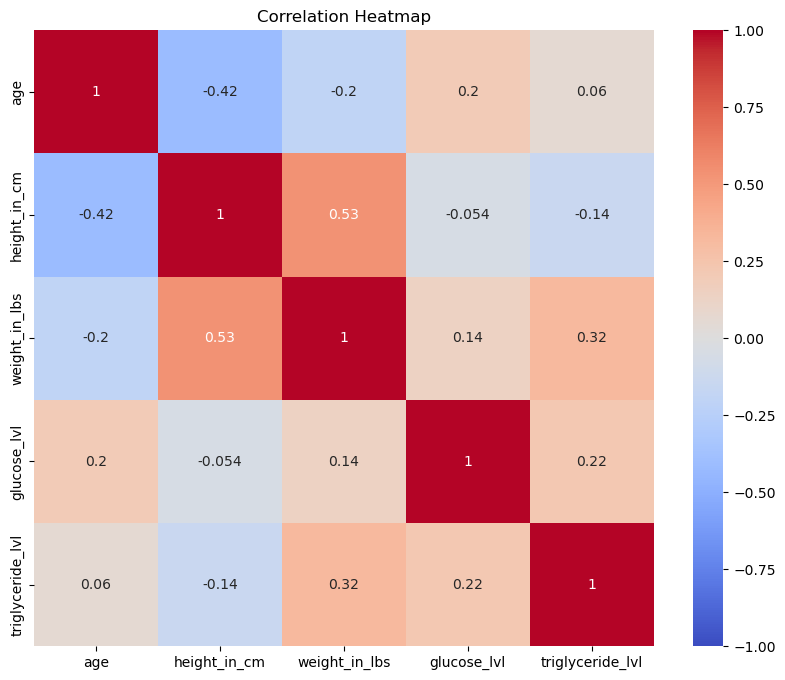

In [111]:

# Visualize the correlation heatmap
selected_features1 = ['age',  'height_in_cm', 'weight_in_lbs', 'glucose_lvl']
correlation_matrix = ldl1[selected_features1 + ['triglyceride_lvl']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
